<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('per.csv')
data.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NewsID     10999 non-null  int64 
 1   Title      10999 non-null  object
 2   Body       10999 non-null  object
 3   Date       10999 non-null  object
 4   Time       10999 non-null  object
 5   Category   10999 non-null  object
 6   Category2  10999 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.6+ KB


In [6]:
len(data['Category2'].unique())

11

In [7]:
len(data['Category'].unique())

97

In [10]:
print(data['Body'].iloc[0])


وزير علوم در جمع استادان نمونه كشور گفت: از استادان نمونه كشور انتظار مي‌رود كه رويكرد دانايي محوري و گفتمان علمي را به عنوان يك بحث فرهنگي در دانشگاهها توسعه و رونق بخشند. به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ايران (ايسنا)، دكتر محمد مهدي زاهدي در اولين مجمع عمومي استادان نمونه دانشگاه‌هاي سراسر كشور كه در دانشگاه تهران برگزار شد، افزود: توصيه ما در جهت تلاش براي دانايي محوري و توسعه گفتمان علمي به معني عدم تمايل به مباحث سياسي نيست؛ بلكه برعكس، دانشگاه بايد مهد چالشهاي گفتماني باشد ولي اين امر، بدان معني نيست كه دانشگاه، ابزار دست سياسيون قرار بگيرد. وي تأكيد كرد: دانشگاه نه تنها نبايد تحت تأثير القائات سياسي قرار بگيرد؛ بلكه بايد خط دهنده و برنامه‌ريز جريانات سياسي باشد و مهمترين عنصر پياده شدن اين آرمان، دانشجويان و اعضاي هيات علمي دانشگاهها و در رأس آنها استادان نمونه هستند. وزير علوم با ذكر اين نكته كه در جامعه اطلاعاتي نمي‌توان هيچ تفكري را با تهديد و ارعاب حاكم كرد، افزود: اگر چه دانشگاهها بايد پرچمدار كرسيهاي آزاد انديشي و حاكميت دانايي محوري باشند، بايد توجه داشته ب

In [11]:
with open('stopwords.txt',encoding='utf8') as stopwords_file:
    stopwords = stopwords_file.readlines()

In [13]:
print(stopwords)

['\ufeff!\n', '"\n', '#\n', '(\n', ')\n', '*\n', ',\n', '-\n', '.\n', '/\n', ':\n', '[\n', ']\n', '«\n', '»\n', '،\n', '؛\n', '؟\n', 'آباد\n', 'آخ\n', 'آخر\n', 'آخرها\n', 'آخه\n', 'آدمهاست\n', 'آرام\n', 'آرام آرام\n', 'آره\n', 'آری\n', 'آزادانه\n', 'آسان\n', 'آسیب پذیرند\n', 'آشنایند\n', 'آشکارا\n', 'آقا\n', 'آقای\n', 'آقایان\n', 'آمد\n', 'آمدن\n', 'آمده\n', 'آمرانه\n', 'آن\n', 'آن گاه\n', 'آنان\n', 'آنانی\n', 'آنجا\n', 'آنرا\n', 'آنطور\n', 'آنقدر\n', 'آنها\n', 'آنهاست\n', 'آنچنان\n', 'آنچنان که\n', 'اونجور\n', 'اونجوری\n', 'اونجوری که\n', 'آنچه\n', 'آنکه\n', 'آنگاه\n', 'آن\u200cها\n', 'آهان\n', 'آهای\n', 'آور\n', 'آورد\n', 'آوردن\n', 'آورده\n', 'آوه\n', 'آی\n', 'آیا\n', 'آید\n', 'آیند\n', 'ا\n', 'اتفاقا\n', 'اثرِ\n', 'اجراست\n', 'احتراما\n', 'احتمالا\n', 'احیاناً\n', 'اخیر\n', 'اخیراً\n', 'اری\n', 'از\n', 'از آن پس\n', 'از بس که\n', 'از جمله\n', 'ازاین رو\n', 'ازجمله\n', 'ازش\n', 'اساسا\n', 'اساساً\n', 'است\n', 'استفاد\n', 'استفاده\n', 'اسلامی اند\n', 'اش\n', 'اشتباها\n', 'اشکارا\n', 

In [14]:
stopwords=[w.replace('\n','') for w in stopwords  ]

In [15]:
print(stopwords)

['\ufeff!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان', 'آسیب پذیرند', 'آشنایند', 'آشکارا', 'آقا', 'آقای', 'آقایان', 'آمد', 'آمدن', 'آمده', 'آمرانه', 'آن', 'آن گاه', 'آنان', 'آنانی', 'آنجا', 'آنرا', 'آنطور', 'آنقدر', 'آنها', 'آنهاست', 'آنچنان', 'آنچنان که', 'اونجور', 'اونجوری', 'اونجوری که', 'آنچه', 'آنکه', 'آنگاه', 'آن\u200cها', 'آهان', 'آهای', 'آور', 'آورد', 'آوردن', 'آورده', 'آوه', 'آی', 'آیا', 'آید', 'آیند', 'ا', 'اتفاقا', 'اثرِ', 'اجراست', 'احتراما', 'احتمالا', 'احیاناً', 'اخیر', 'اخیراً', 'اری', 'از', 'از آن پس', 'از بس که', 'از جمله', 'ازاین رو', 'ازجمله', 'ازش', 'اساسا', 'اساساً', 'است', 'استفاد', 'استفاده', 'اسلامی اند', 'اش', 'اشتباها', 'اشکارا', 'اصلا', 'اصلاً', 'اصولا', 'اصولاً', 'اعلام', 'اغلب', 'افزود', 'افسوس', 'اقل', 'اقلیت', 'الا', 'الان', 'البته', 'البتّه', 'الهی', 'الی', 'ام', 'اما', 'امروز', 'امروزه', 'امسال', 'امشب', 'امور',

In [16]:
len(stopwords)

1892

In [30]:
with open('stopwords-Farsi1.txt',encoding='utf8') as stopwords_file2:
    stopwords2 = stopwords_file2.readlines()

In [31]:
print(stopwords2)

['\ufeffات\n', 'اتفاقا\n', 'اجراست\n', 'احتمالا\n', 'احيانا\n', 'اخ\n', 'اختصارا\n', 'اخر\n', 'اخرها\n', 'اخه\n', 'اخيرا\n', 'ادمهاست\n', 'اراسته\n', 'ارام\n', 'ارزانتر\n', 'ارزومندانه\n', 'ارنه\n', 'اره\n', 'از\n', 'ازادانه\n', 'ازان\n', 'ازانجا\n', 'ازانجاكه\n', 'ازاين\n', 'ازاينرو\n', 'ازبه\n', 'ازجمله\n', 'ازروي\n', 'ازسر\n', 'ازش\n', 'ازقبيل\n', 'ازلحاظ\n', 'ازنظر\n', 'ازو\n', 'ازيك\n', 'اساس\n', 'اساسا\n', 'اسان\n', 'اسانتر\n', 'اساني\n', 'است\n', 'استوارتر\n', 'اسيبپذيرند\n', 'اش\n', 'اشان\n', 'اشتباها\n', 'اشفته\n', 'اشكار\n', 'اشكارا\n', 'اشكارتر\n', 'اشنايند\n', 'اصطلاحا\n', 'اصلا\n', 'اصولا\n', 'اطلاعند\n', 'اغلب\n', 'افزودن\n', 'افسوس\n', 'افقي\n', 'اقل\n', 'اقلا\n', 'اقليت\n', 'اكتسابا\n', 'اكثر\n', 'اكثرا\n', 'اكثريت\n', 'اكنون\n', 'الا\n', 'الاسف\n', 'الان\n', 'البته\n', 'الزاما\n', 'الظاهر\n', 'المقدور\n', 'الهي\n', 'الي\n', 'ام\n', 'اما\n', 'امان\n', 'امرانه\n', 'امروز\n', 'امروزه\n', 'امسال\n', 'امشب\n', 'اميدوارم\n', 'اميدوارند\n', 'اميدواريم\n', 'ان\n', 'انان\n', 'ا

In [34]:
stopwords2=[w.replace('\n','') for w in stopwords2  ]

In [39]:
stopwords2[0]

'\ufeffات'

In [42]:
stopwords2[0]=stopwords2[0].replace('\ufeff','')

In [43]:
print(stopwords2)

['ات', 'اتفاقا', 'اجراست', 'احتمالا', 'احيانا', 'اخ', 'اختصارا', 'اخر', 'اخرها', 'اخه', 'اخيرا', 'ادمهاست', 'اراسته', 'ارام', 'ارزانتر', 'ارزومندانه', 'ارنه', 'اره', 'از', 'ازادانه', 'ازان', 'ازانجا', 'ازانجاكه', 'ازاين', 'ازاينرو', 'ازبه', 'ازجمله', 'ازروي', 'ازسر', 'ازش', 'ازقبيل', 'ازلحاظ', 'ازنظر', 'ازو', 'ازيك', 'اساس', 'اساسا', 'اسان', 'اسانتر', 'اساني', 'است', 'استوارتر', 'اسيبپذيرند', 'اش', 'اشان', 'اشتباها', 'اشفته', 'اشكار', 'اشكارا', 'اشكارتر', 'اشنايند', 'اصطلاحا', 'اصلا', 'اصولا', 'اطلاعند', 'اغلب', 'افزودن', 'افسوس', 'افقي', 'اقل', 'اقلا', 'اقليت', 'اكتسابا', 'اكثر', 'اكثرا', 'اكثريت', 'اكنون', 'الا', 'الاسف', 'الان', 'البته', 'الزاما', 'الظاهر', 'المقدور', 'الهي', 'الي', 'ام', 'اما', 'امان', 'امرانه', 'امروز', 'امروزه', 'امسال', 'امشب', 'اميدوارم', 'اميدوارند', 'اميدواريم', 'ان', 'انان', 'اناني', 'انجا', 'اند', 'اندك', 'اندكي', 'انرا', 'انشاالله', 'انقدر', 'انكس', 'انكه', 'انم', 'انها', 'انهاست', 'انوقت', 'انچنان', 'انچه', 'انگار', 'انگاه', 'انگه', 'انگونه', 'اهان', 'اها

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(nltk_stopwords)
stopwords[200]

'بالای'

In [ ]:
nltk_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import hazm
stemmer = hazm.Stemmer()

In [ ]:
lemmatizer2 = hazm.Lemmatizer()

In [ ]:
stemmer.stem('کتاب ها')

'کتاب '

In [ ]:
lemmatizer2.lemmatize('گفت')

'گفت#گو'

In [ ]:
from hazm import word_tokenize

In [ ]:
dataset = pd.DataFrame(columns=('title_body', 'category'))
for index, row in data.iterrows():
    title_body = row['Title'] + ' ' + row['Body']
    title_body_tokenized = word_tokenize(title_body)
    title_body_tokenized_filtered = [w for w in title_body_tokenized if not w in stopwords]
    title_body_tokenized_filtered_stemmed = [stemmer.stem(w) for w in title_body_tokenized_filtered]
    dataset.loc[index] = {
        'title_body': ' '.join(title_body_tokenized_filtered_stemmed),
        'category': row['Category2'].replace('\n', '')
    }

In [ ]:
# dataset2 = pd.DataFrame(columns=('title_body', 'category'))
# for index, row in data.iterrows():
#     title_body = row['Title'] + ' ' + row['Body']
#     title_body_tokenized = word_tokenize(title_body)
#     title_body_tokenized_filtered = [w for w in title_body_tokenized if not w in stopwords]
#     title_body_tokenized_filtered_stemmed = [stemmer.stem(w) for w in title_body_tokenized_filtered]
# #     print(title_body_tokenized_filtered_stemmed)
#     dataset2.loc[index] = {
#         'title_body': ' '.join(title_body_tokenized_filtered_stemmed),
#         'category': row['Category2'].replace('\n', '')
#     }
#     break
# dataset2.iloc[0][0]

In [ ]:
data.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي


In [ ]:
dataset.head()

,title_body,category
0,وزير علو درجمع استاد نمونه سن بازنشستگي استاد ...,آموزشي
1,گردهمايي دانش‌آموختگ موسسه آموز عالي سوره برگز...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ن...,آموزشي
3,هماي يكروزه آسيب مفهو روابط عمومي بابلسر برگزا...,اجتماعي
4,وضعي اقتصادي ميز تحصيل والدين مهمترين عوامل مو...,آموزشي


In [ ]:
dataset[dataset['category']=='فرهنگي'].count()

title_body    1000
category      1000
dtype: int64

In [ ]:
dataset['category'].unique()

array(['آموزشي', 'اجتماعي', 'تاريخي', 'اقتصادي', 'بهداشتي', 'علمي',
       'سياسي', 'فرهنگي', 'فقه و حقوق', 'مذهبي', 'ورزشي'], dtype=object)

In [ ]:
xx=dataset['category'].unique()
for i in range(len(dataset['category'].unique())):
    print(xx[i],dataset[dataset['category']==xx[i]].count())

آموزشي title_body    1000
category      1000
dtype: int64
اجتماعي title_body    1000
category      1000
dtype: int64
تاريخي title_body    999
category      999
dtype: int64
اقتصادي title_body    1000
category      1000
dtype: int64
بهداشتي title_body    1000
category      1000
dtype: int64
علمي title_body    1000
category      1000
dtype: int64
سياسي title_body    1000
category      1000
dtype: int64
فرهنگي title_body    1000
category      1000
dtype: int64
فقه و حقوق title_body    1000
category      1000
dtype: int64
مذهبي title_body    1000
category      1000
dtype: int64
ورزشي title_body    1000
category      1000
dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(dataset['title_body'])

TfidfVectorizer()

In [ ]:
X = vectorizer.transform(dataset['title_body'])

In [ ]:
X.shape

(10999, 60814)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y = le.fit_transform(dataset['category'])

In [ ]:
le.classes_

array(['آموزشي', 'اجتماعي', 'اقتصادي', 'بهداشتي', 'تاريخي', 'سياسي',
       'علمي', 'فرهنگي', 'فقه و حقوق', 'مذهبي', 'ورزشي'], dtype=object)

In [ ]:
len(y)

10999

In [ ]:
import numpy as np
print(np.unique(dataset['category']))

['آموزشي' 'اجتماعي' 'اقتصادي' 'بهداشتي' 'تاريخي' 'سياسي' 'علمي' 'فرهنگي'
 'فقه و حقوق' 'مذهبي' 'ورزشي']


In [ ]:
np.shape(X)

(10999, 60814)

In [ ]:
np.shape(y)

(10999,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [ ]:
from sklearn import svm
svmc = svm.SVC()

In [ ]:

svmc.fit(X_train, y_train)

SVC()

In [ ]:
svmc.score(X_test, y_test)

0.832

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svmc.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86       258\n           1       0.56      0.64      0.60       251\n           2       0.84      0.75      0.80       268\n           3       0.84      0.94      0.89       264\n           4       0.92      0.91      0.92       248\n           5       0.79      0.75      0.77       251\n           6       0.83      0.72      0.77       260\n           7       0.82      0.84      0.83       229\n           8       0.87      0.87      0.87       235\n           9       0.93      0.90      0.92       239\n          10       0.96      0.95      0.95       247\n\n    accuracy                           0.83      2750\n   macro avg       0.84      0.83      0.83      2750\nweighted avg       0.84      0.83      0.83      2750\n'

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       258
           1       0.56      0.64      0.60       251
           2       0.84      0.75      0.80       268
           3       0.84      0.94      0.89       264
           4       0.92      0.91      0.92       248
           5       0.79      0.75      0.77       251
           6       0.83      0.72      0.77       260
           7       0.82      0.84      0.83       229
           8       0.87      0.87      0.87       235
           9       0.93      0.90      0.92       239
          10       0.96      0.95      0.95       247

    accuracy                           0.83      2750
   macro avg       0.84      0.83      0.83      2750
weighted avg       0.84      0.83      0.83      2750



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[230  12   0   2   0   3   9   2   0   0   0]
 [ 12 160  13  13   3   8  12  13  10   4   3]
 [  3  36 202   3   0   7   9   5   2   0   1]
 [  0   4   1 249   0   1   6   1   1   0   1]
 [  2   6   1   0 226   8   0   2   1   2   0]
 [  4  11  14   1  10 189   0   6  15   1   0]
 [ 22   9   5  24   1   4 186   5   0   0   4]
 [  0  19   1   1   2   4   2 192   2   6   0]
 [  1  10   1   1   2  11   0   2 204   3   0]
 [  0   9   2   1   1   3   0   6   0 216   1]
 [  1   9   0   0   0   1   1   1   0   0 234]]


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

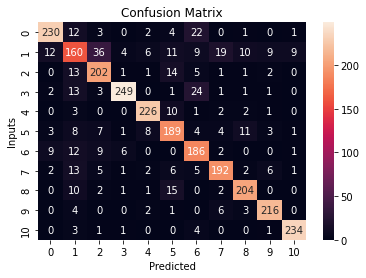

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Inputs")
plt.title("Confusion Matrix")
plt.show()